<a href="https://colab.research.google.com/github/aysua/NN_LinearRegression/blob/master/multivariable_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#My input and output sets
my_input=np.array([[0,0],[0,1],[1,0],[1,1]])
my_output=np.array([[0],[0],[0],[1]])

In [0]:
#All methods and initialization

def init():
  example_number=my_input.shape[0]
  feature_number=my_input.shape[1]

  z=np.array(np.zeros(example_number))
  weights=np.random.rand(1,feature_number)
  g_weights=weights.shape
  bias=0;
  g_bias=np.zeros(shape=(example_number,1))
  lr=0.5;
  loss=0.001;
  return z, weights, g_weights, bias, g_bias, lr, loss, example_number, feature_number

def feedforward(x,bias,z,weights):
  z=np.dot(x,np.transpose(weights))+bias
  return z

def backprop(example_number,x,y,z,weights, g_weights,lr,bias,g_bias):
  g_weights=(1/example_number)*np.sum((z-y)*x)
  g_bias=(1/example_number)*np.sum((z-y))
  weights=weights-lr*g_weights
  bias=bias-lr*g_bias
  return weights, g_weights, bias, g_bias

def lossfunction(loss, example_number,z,y):
  loss=1/(2*example_number)*(np.power(np.sum(z-y),2))
  return loss

def predict(weights,x,bias):
  result=np.dot(x,np.transpose(weights))+bias
  return result


In [0]:
#Dummy variables
iteration=100;
loss_array=[]

#Train phase
z, weights, g_weights, bias, g_bias, lr, loss,example_number,feature_number=init()

while(iteration>=0):
  z=feedforward(my_input,bias,z,weights)
  loss=lossfunction(loss, example_number,z,my_output)
  weights, g_weights, bias, g_bias=backprop(example_number,my_input,my_output,z,weights, g_weights,lr,bias,g_bias)
  iteration-=1
  if(iteration%10):
    loss_array.append(loss)

print(weights,bias)
print(loss)

[[0.43305716 0.56693899]] -0.24999752955535948
7.399392052324024e-13


[[-0.24999753]
 [ 0.31694146]
 [ 0.18305963]
 [ 0.74999861]]


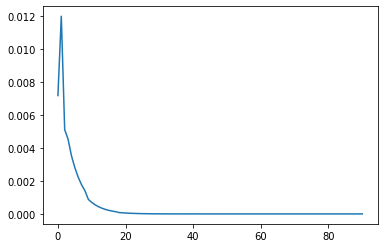

In [0]:
#Prediction
my_test_array=np.array([[1,1]])

result=predict(weights,my_input,bias)
print(result)
plt.plot(loss_array)